# Application: Sunglasses Filter
###### by: João Ataíde
---

In [1]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
%matplotlib inline

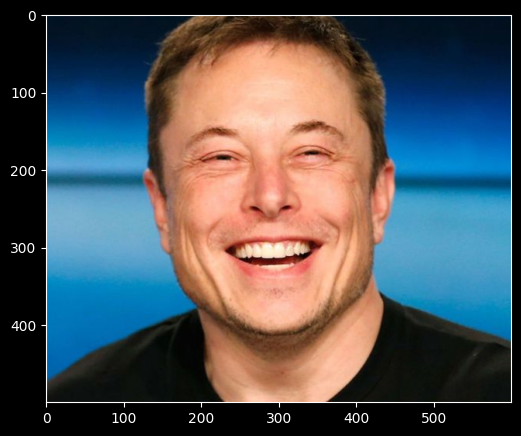

In [2]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w1 - Getting Started\data"

imagePath = f"{DATA_PATH}\\images\\musk.jpg"
image = cv2.imread(imagePath, 1)
image = np.float32(image)/255
plt.imshow(image[:,:,::-1]);

Sunglass dimension (136, 314, 4)


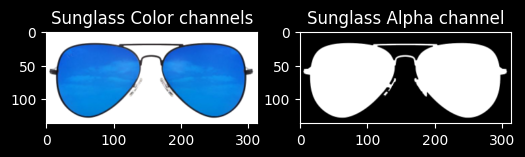

In [3]:
glass = f"{DATA_PATH}\\images\\sunglass.png"
glassPNG = cv2.imread(glass, -1)
glassPNG = np.float32(glassPNG)/255

glassPNG = cv2.resize(glassPNG, None, fx = 0.5, fy = 0.5)
glassH, glassW, glassChannel = glassPNG.shape
print(f"Sunglass dimension {glassPNG.shape}")

glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

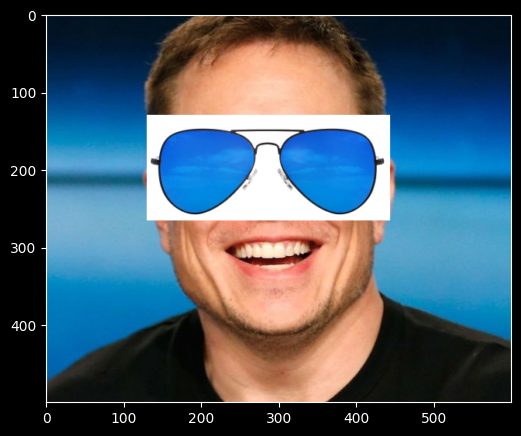

In [4]:
topLeftRow = 130
topLeftCol = 130

bottomRightRow = topLeftRow + glassH
bottomRightCol = topLeftCol + glassW

faceNative = image.copy()

faceNative[topLeftRow:bottomRightRow, topLeftCol:bottomRightCol] = glassBGR
plt.imshow(faceNative[:,:,::-1]);

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

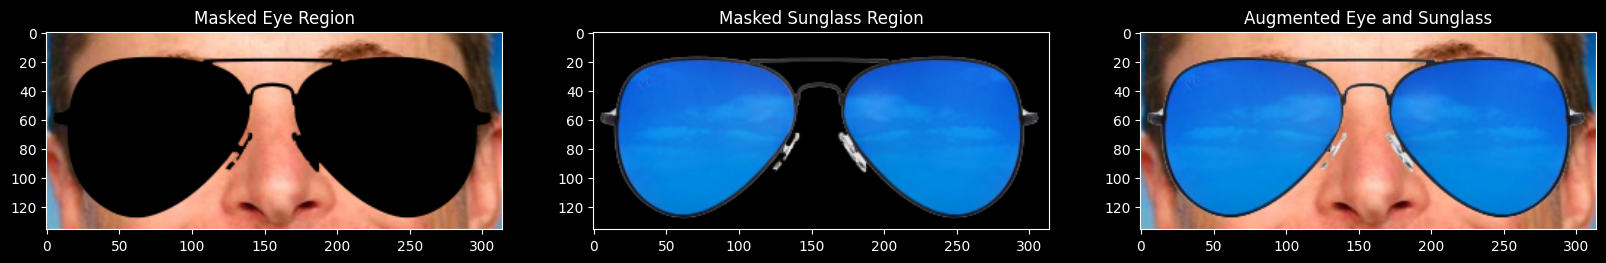

In [5]:
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))
faceArithmetic = image.copy()

eyesRoi = faceArithmetic[topLeftRow:bottomRightRow,
          topLeftCol:bottomRightCol]

maskedEye = cv2.multiply(eyesRoi, (1 - glassMask))
maskedGlass = cv2.multiply(glassBGR, glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

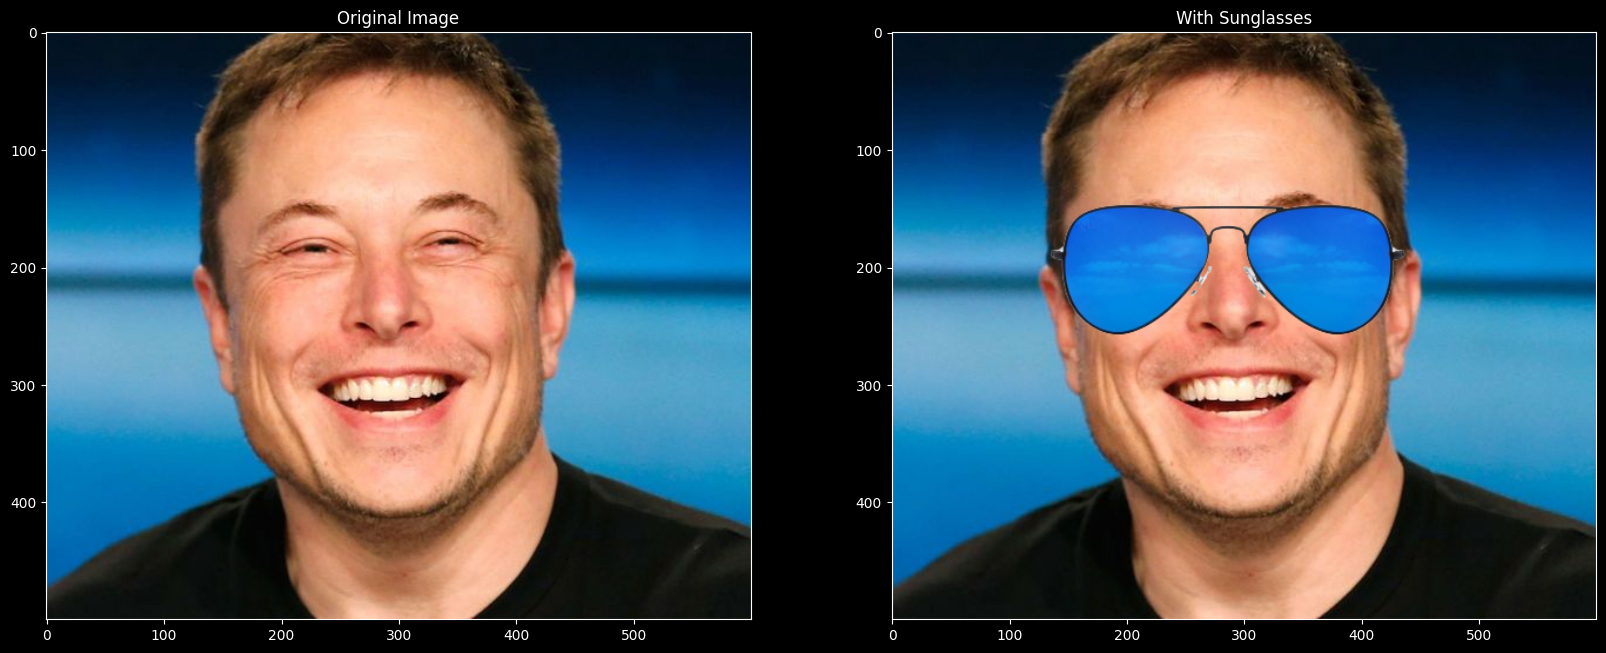

In [6]:
faceArithmetic[topLeftRow:bottomRightRow, topLeftCol:bottomRightCol] = eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(image[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceArithmetic[:,:,::-1]);plt.title("With Sunglasses");

https://www.youtube.com/watch?v=HZ3mhgbjtRU